## 4.4 勾配

- $x_0$と$x_1$の偏微分をまとめて計算する
- たとえば $x_0=3,x_1=4$のときの$(x_0, x_1)$の両方の偏微分をまとめて、
$\left(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1}\right)$として計算する

- $\left(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1}\right)$のように、すべての変数の偏微分をベクトルとしてまとめたものを勾配(gradient)という。

In [169]:
import numpy as np

In [170]:
# 勾配の実装例
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # xと同じ形状の配列を生成
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
        
    return grad
        

In [171]:
# 実装
def function_2(x):
    return x[0]**2 + x[1]**2
    # または
    # return np.sum(x**2)

##### function_2のグラフ

In [172]:
from mpl_toolkits.mplot3d import Axes3D

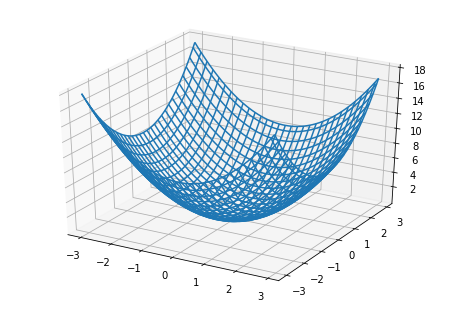

In [173]:
x0 = np.arange(-3, 3, 0.1)
x1 = np.arange(-3, 3, 0.1)
X0, X1 = np.meshgrid(x0, x1)
Y = X0 ** 2 + X1 ** 2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X0,X1,Y)
plt.show()

In [174]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([ 6.,  8.])

In [175]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([ 0.,  4.])

In [176]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([ 6.,  0.])

#### gradient_2d.py

/home/masaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


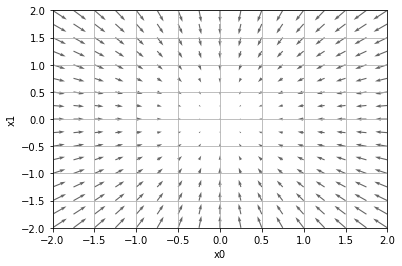

In [177]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

### 4.4.1 勾配法

- 機械学習では最適なパラメータを探索する(学習することで見つけ出す)
- ニューラルネットワークでは重みとバイアス(の最適値)を探す
- 勾配を利用して、関数の最小値(最小というよりは、できるだけ小さな値=極小値)
- 勾配の指す先に進めば、より小さな値に近づけるはずだが、それが関数全体の最小値とは限らない
- なぜならば
  - デコボコした複雑な関数の場合、そこが最小値とは限らない
  - 最大値かもしれない(見る方向によっては、最小値=最大値)
- すなわち見つけ出せるのは「鞍点」に過ぎない
  - 関数が複雑なとき「プラトー」に陥ることがある(学習が進まない状態)
- それでもまあ、この方法なら、値を減らせることは間違いないので、まずはこれで良しとする、という方法。



- 数式で表す

$$
x_0 = x_0 - \eta\frac{\partial f}{\partial x_0}
$$
$$
x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}
$$
- ここで$ \eta\ $は更新量
   - ニューラルネットワークの学習においては**学習率**と呼ばれる
   - １回の学習で、どれだけ学習すべきか、どれだけパラメータを更新するか、ということを決める
   



#### 勾配降下法のPython実装


In [178]:
# fは最適化したい関数
# init_xは初期値
# lr はlearning rate 学習率
# step_numは勾配法による繰り返しの数
# この関数で求められるのは「極小値」（うまく行けば最小値）
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

##### 問: $ f(x_0) = x_0^2 + x_1^2 $の最小値を勾配法で求めよ。


In [179]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [180]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

###### 勾配法による更新のプロセスの図示化

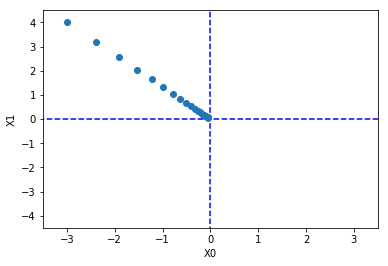

In [181]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


#### 学習率の違いによる結果の実験

In [182]:
# fは最適化したい関数
# init_xは初期値
# lr はlearning rate 学習率
# step_numは勾配法による繰り返しの数
# この関数で求められるのは「極小値」（うまく行けば最小値）
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [183]:
# 学習率が大きすぎる例：lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [184]:
# 学習率が小さすぎる例：lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

#### 学習率の違いによる結果の実験の可視化

In [195]:
def gradient_descent_history(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

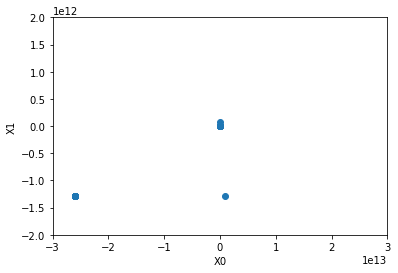

In [196]:
# 学習率が大きすぎる例：lr=10.0
init_x = np.array([-3.0, 4.0])    
lr = 10.0
step_num = 100
x, x_history = gradient_descent_history(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3e+13, 3e+13) ## 変えた
plt.ylim(-2e+12, 2e+12) ## 変えた
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

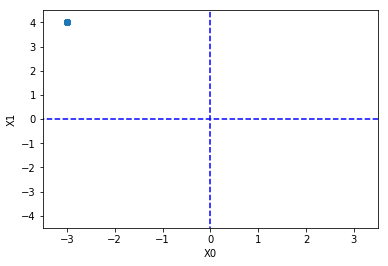

In [187]:
# 学習率が小さすぎる例：lr = 1e-10
init_x = np.array([-3.0, 4.0])    
lr = 1e-10
step_num = 100
x, x_history = gradient_descent_history(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2 ニューラルネットワークに対する勾配

- たとえば、形状が２ｘ３で、重みＷだけを持つニューラルネットワークにおいて損失関数をＬで表す場合を考える
- 勾配は$ \frac{\partial L}{\partial W} $

$$
W = \left(
        \begin{array}{ccc}
            w_{11} & w_{12} & w_{13} \\
            w_{21} & w_{22} & w_{23} \\
        \end{array}
    \right)
$$

$$
\frac{\partial L}{\partial W} = 
    \left(
        \begin{array}{ccc}
            \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
            \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} \\
        \end{array}
    \right)
$$